In [1]:
!python3 --version

Python 3.8.11


In [2]:
import pandas

from utils import calculate_percent_replicating_MOA, calculate_percent_matching_MOA
from utils import plot_simple_comparison, plot_two_comparisons

In [3]:
variable = 'Exposure time'
variable_to_save = variable.replace(' ','_')

In [4]:
variable = 'Exposure time'

plate_df = pandas.DataFrame()

stain_3_dict = {33:'A',32:'B',28:'C',26:'D',25:'E'}

for eachplate in [33,32,28,26,25]:
    plate_df = plate_df.append({'Plate Name' : f'BR001151{eachplate}', 
    variable : 'Lower', 'Batch' : f'Stain3-Cond{stain_3_dict[eachplate]}', 
    'Percent Replicating' : calculate_percent_replicating_MOA(
        '../profiles-pilots/profiles/2020_08_11_Stain3_Standard',f'BR001151{eachplate}'), 
    'Percent Matching' : calculate_percent_matching_MOA(
        '../profiles-pilots/profiles/2020_08_11_Stain3_Standard',f'BR001151{eachplate}')}, ignore_index=True)
    
    plate_df = plate_df.append({'Plate Name' : f'BR001151{eachplate}', 
    variable : 'Higher', 'Batch' : f'Stain3-Cond{stain_3_dict[eachplate]}', 
    'Percent Replicating' : calculate_percent_replicating_MOA(
        '../profiles-pilots/profiles/2020_08_11_Stain3_HighExp',f'BR001151{eachplate}'), 
    'Percent Matching' : calculate_percent_matching_MOA(
        '../profiles-pilots/profiles/2020_08_11_Stain3_HighExp',f'BR001151{eachplate}')}, ignore_index=True)

stain_4_dict = {'A':{'platelist':['BR00116622','200922_015124-V','200921_193743-V'],
'batchpath_lower':'../profiles-pilots/profiles/2020_09_22_Stain4_Standard',
'batchpath_higher':'../profiles-pilots/profiles/2020_09_22_Stain4_Bray_HighExp'},
'F':{'platelist':['BR00116629','BR00116630','BR00116631'],
'batchpath_lower':'../profiles-pilots/profiles/2020_09_22_Stain4_Standard',
'batchpath_higher':'../profiles-pilots/profiles/2020_09_22_Stain4_HighExp'},
'G':{'platelist':['BR00116625','BR00116627','BR00116628'],
'batchpath_lower':'../profiles-pilots/profiles/2020_09_22_Stain4_Standard',
'batchpath_higher':'../profiles-pilots/profiles/2020_09_22_Stain4_HighExp'},
'H':{'platelist':['BR00116620','BR00116621','BR00116624'],
'batchpath_lower':'../profiles-pilots/profiles/2020_09_22_Stain4_Bray',
'batchpath_higher':'../profiles-pilots/profiles/2020_09_22_Stain4_Bray_HighExp'}}

for eachbatch in stain_4_dict.keys():
    for eachplate in stain_4_dict[eachbatch]['platelist']:
        plate_df = plate_df.append({'Plate Name' : eachplate, 
            variable : 'Lower', 'Batch' : f'Stain4-Cond{eachbatch}', 
            'Percent Replicating' : calculate_percent_replicating_MOA(
                stain_4_dict[eachbatch]['batchpath_lower'],eachplate), 
            'Percent Matching' : calculate_percent_matching_MOA(
                stain_4_dict[eachbatch]['batchpath_lower'],eachplate)}, ignore_index=True)
        plate_df = plate_df.append({'Plate Name' : eachplate, 
            variable : 'Higher', 'Batch' : f'Stain4-Cond{eachbatch}', 
            'Percent Replicating' : calculate_percent_replicating_MOA(
                stain_4_dict[eachbatch]['batchpath_higher'],eachplate), 
            'Percent Matching' : calculate_percent_matching_MOA(
                stain_4_dict[eachbatch]['batchpath_higher'],eachplate)}, ignore_index=True)


Saved to ../figures/Exposure time-Percent Replicating-Batch-None-None.png


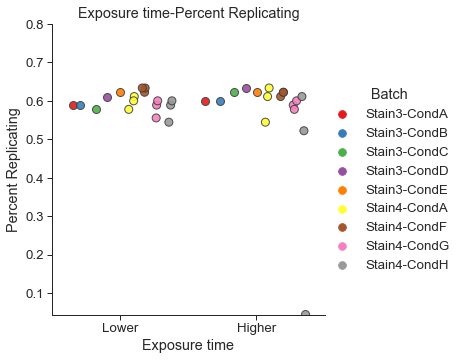

In [5]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,y='Percent Replicating',hue='Batch')

Saved to ../figures/Exposure time-Percent Matching-Batch-None-None.png


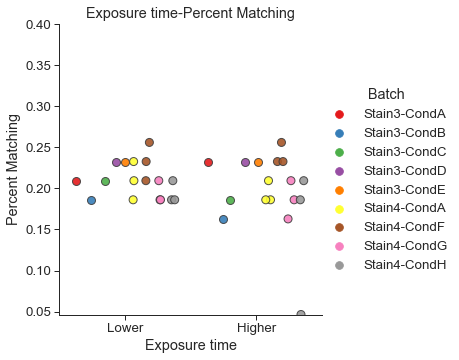

In [6]:
plot_simple_comparison(df=plate_df,x=variable,y='Percent Matching',hue='Batch',ylim=[0.05,0.4])

Saved to ../figures/Percent Replicating-Percent Matching-Batch-Exposure time-None.png


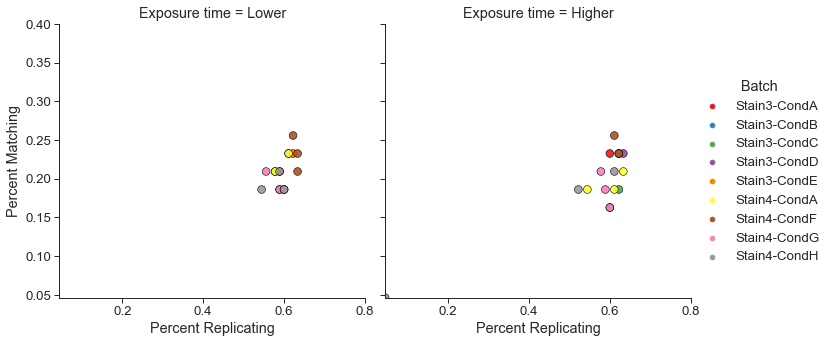

In [7]:
plot_two_comparisons(df=plate_df,hue='Batch',col=variable)

In [8]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}.csv',index=False)